In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('SMSSpamCollection',sep='\t',header=None)

In [3]:
data.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.columns = ['label','message']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [7]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
data['length'] = data['message'].apply(len)

In [9]:
data.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Data Visualisation

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

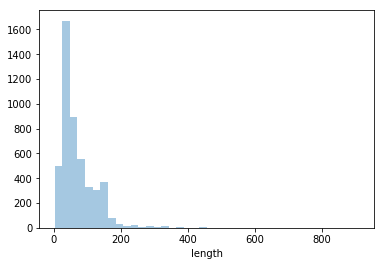

In [11]:
sns.distplot(data['length'][data['label'] == 'ham'],bins=40,kde=False)

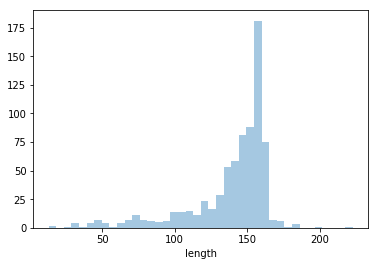

In [12]:
sns.distplot(data['length'][data['label'] == 'spam'],bins=40,kde=False)

From the above 2 graphs we can conclude that the length of a "HAM" message is approximately around 50 while for a "SPAM" message it is around 150 

We will define a function which will remove all the punctuations and the stopwords

In [13]:
from nltk.corpus import stopwords

In [14]:
import string
def text_preproccess(mess):
    nopunc = [chars for chars in mess if chars not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    nosw = [words for words in nopunc.split() if words.lower() not in stopwords.words('english')]
    return nosw

In [15]:
#the above function will return the list of words by removing the punctuations and the stopwords
data['message'].apply(text_preproccess).head()

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [17]:
X = data['message']
y = data['label']

# Bag Of Words Transformer

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
bow_transformer = CountVectorizer(analyzer=text_preproccess).fit(X)

In [19]:
bow = bow_transformer.transform(X)

# Tfidf Transformer

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer

In [22]:
tfidf_transformer = TfidfTransformer().fit(bow)

In [23]:
tfidf = tfidf_transformer.transform(bow)

# Spliting the data for Training and Testing

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(tfidf,y,test_size=0.3)

# Naive-Bayes Classifier

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
mnb = MultinomialNB()

In [28]:
mnb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [29]:
pred = mnb.predict(X_test)

# Evaluating the classifier

In [30]:
from sklearn.metrics import confusion_matrix,classification_report

In [31]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[1449    0]
 [  69  154]]
              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1449
        spam       1.00      0.69      0.82       223

   micro avg       0.96      0.96      0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



Note: If you see the accuracy it is around 98%
But if you try it without TfidfTransformer you will get an accuracy of 99% (not a big deal)